Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).



1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2.Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4.Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
fetch = fetch_california_housing()
fetch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(fetch.DESCR[100:1300])

haracteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geog

In [ ]:
df = pd.DataFrame(fetch.data, columns=fetch.feature_names)
df.head()
# The target variable is the median house value for California districts

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
# п.3-4
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

def get_all_score(X,y, random_seed = 21, model = None):
  if model is None:
    model_start = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = random_seed)
  model_start.fit(X_train, y_train)
  pred_test = model_start.predict(X_test)
  pred_train = model_start.predict(X_train)

    # r2
  print('TRAIN')
  print('score = r2_score')
  print(model_start.score(X_train,y_train))
  # print(metrics.r2_score(y_train,pred_train))
  print('----mse and rmse---------')
  # mse
  mse_m = metrics.mean_squared_error(y_train,pred_train)
  # print(f'mse = {mse_m}')
  # rmse
  print(f' rmse = {np.sqrt(mse_m)}')

  print('TEST')
  print('score = r2_score')
  r2_v = model_start.score(X_test,y_test)
  print(r2_v)
  # print(metrics.r2_score(y_test,pred_test))
  print('----mse and rmse---------')
  # mse
  mse_m = metrics.mean_squared_error(y_test,pred_test)
  print(f'mse = {mse_m}')
  # rmse
  rmse_v = np.sqrt(mse_m)
  print(f' rmse = {rmse_v}')
  rmse_v = np.sqrt(mse_m)
  return rmse_v, r2_v

# plt.scatter(pred, fetch.target)
# plt.plot([0,6],[0,6], color = 'red')


In [ ]:
print('ДО РАБОТЫ НАД ДАННЫМИ:')
rmse_start, r2_start = get_all_score(df,fetch.target, random_seed = 21, model = None)
# на тренировочных и тестовых данных показатели примерно одинаковы => переобучения нет

ДО РАБОТЫ НАД ДАННЫМИ:
TRAIN
score = r2_score
0.6085066783857864
----mse and rmse---------
 rmse = 0.7211329202116264
TEST
score = r2_score
0.5971316271519003
----mse and rmse---------
mse = 0.5416111027038728
 rmse = 0.735942322946488


5.Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

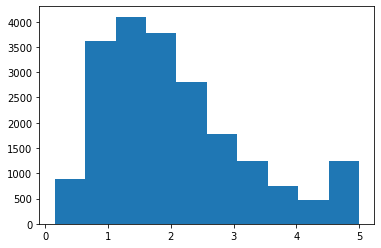

In [ ]:
import matplotlib.pyplot as plt
plt.hist(fetch.target)

6.Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
# Посчитайте и выведите корреляционную матрицу.
#  Убедитесь, что ячейки матрицы поделены на цветные категории,
#  в ячейках указано числовое значение корреляции.
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


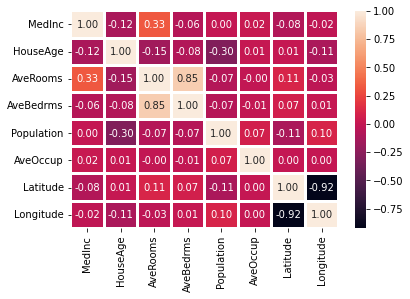

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths = 2)
# широта и долгота оч коррелированы = 0.92
# и кол-во спален и просто комнат = 0.85
# кол-во населения от возраста дома? = 0.3
# остальные параметры мало зависят друг от друга


Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.

In [ ]:
# на основе корреляции
# b. Удалите признаки на основании полученных значений, выводов.
# c. Повторите п. 3, п. 4 на измененных данных.
df_t = df.copy()
# # удалю AveBedrms и посмотрю рез-т # хуже !
for_drop = ['AveBedrms']
df_cor_drop_l = df_t.drop(columns=for_drop) 
# print('ПОСЛЕ УДАЛЕНИЯ AveBedrms')
get_all_score(df_cor_drop_l,fetch.target, random_seed = 21, model = None)

# # ухудшается

TRAIN
score = r2_score
0.5983267497798949
----mse and rmse---------
 rmse = 0.7304484941880436
TEST
score = r2_score
0.5876649027725733
----mse and rmse---------
mse = 0.5543380462309441
 rmse = 0.7445388144555958


(0.7445388144555958, 0.5876649027725733)

In [ ]:
df_t = df.copy()
# # удалю Latitude и посмотрю рез-т # хуже !
for_drop = ['Latitude']
df_cor_drop_l = df_t.drop(columns=for_drop) 
print('ПОСЛЕ УДАЛЕНИЯ Latitude')
get_all_score(df_cor_drop_l,fetch.target, random_seed = 21, model = None)

ПОСЛЕ УДАЛЕНИЯ Latitude
TRAIN
score = r2_score
0.5434171634092508
----mse and rmse---------
 rmse = 0.7787766718891769
TEST
score = r2_score
0.5303585281516914
----mse and rmse---------
mse = 0.6313800054469378
 rmse = 0.794594239500223


(0.794594239500223, 0.5303585281516914)



Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


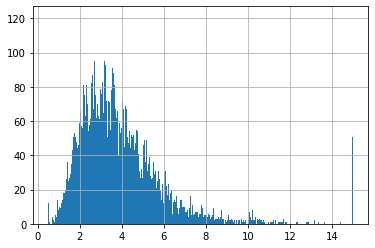

In [ ]:
df['MedInc'].hist(bins=1000)
# ну допустим по Population всё что больше 10000 это выбросы, во всяком случае ос далеко от среднего - 1425
# по MedInc - выбросы > 14

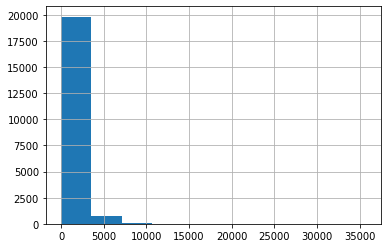

In [ ]:
df['Population'].hist()

In [ ]:
# совмещу атрибуты и таргет, что б при удалении строк - их оставалось равное кол-во
# не очень уверена что так логично делать 

df_big_start = pd.concat([df,pd.DataFrame(fetch.target)],axis=1)
df_big_start.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,0
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df_big = df_big_start.copy()
df_cor_drop_popul_less_5k = df_big[(df_big['Population']<10000)] 
y_big = df_cor_drop_popul_less_5k[0]
df_cor_drop_popul_less_5k_attr = df_cor_drop_popul_less_5k.drop(columns=[0]) 
print('ПОСЛЕ отброса выбросов по Population')
get_all_score(df_cor_drop_popul_less_5k_attr,y_big, random_seed = 21, model = None)
# хуже


ПОСЛЕ отброса выбросов по Population
TRAIN
score = r2_score
0.6085157337963569
----mse and rmse---------
 rmse = 0.7215433624314247
TEST
score = r2_score
0.593546337721265
----mse and rmse---------
mse = 0.5444566502294249
 rmse = 0.7378730583436591


(0.7378730583436591, 0.593546337721265)

In [ ]:
df_big = df_big_start.copy()
df_cor_drop_Accup_less_500 = df_big[df_big['AveOccup']<500]
y_big = df_cor_drop_Accup_less_500[0]
df_cor_drop_Accup_less_500_attr = df_cor_drop_Accup_less_500.drop(columns=[0]) 
print('ПОСЛЕ отброса выбросов по AveOccup')
rmse_drop_aveoccup, r2_drop_aveoccup = get_all_score(df_cor_drop_Accup_less_500_attr,y_big, random_seed = 21, model = None)
# чутка +!!!!!! оставляю!

ПОСЛЕ отброса выбросов по AveOccup
TRAIN
score = r2_score
0.6123715543478937
----mse and rmse---------
 rmse = 0.7168517426012249
TEST
score = r2_score
0.6121748303809267
----mse and rmse---------
mse = 0.5252794415121007
 rmse = 0.7247616446198714


In [ ]:
# df_big = df_big_start.copy()
# df_cor_drop_MedInc_less_15 = df_big[df_big['MedInc']<15]
# y_big = df_cor_drop_MedInc_less_15[0]
# df_cor_drop_MedInc_less_15_attr = df_cor_drop_MedInc_less_15.drop(columns=[0]) 
# print('ПОСЛЕ отброса выбросов по MedInc')
# get_all_score(df_cor_drop_MedInc_less_15_attr,y_big, random_seed = 21, model = None)
# хуже

Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
# ну допустим признак population выделяется своим уровнем на фоне остальных. прологарифмируем его
df_cor_drop_Accup_less_500_attr['Population'] = df_cor_drop_Accup_less_500_attr['Population'].apply(np.log)
print('ПОСЛЕ логорифмирования Population')
rmse_log, r2_log = get_all_score(df_cor_drop_Accup_less_500_attr,y_big, random_seed = 21, model = None)
# малость лучше = > оставляю

ПОСЛЕ логорифмирования Population
TRAIN
score = r2_score
0.6124036336628456
----mse and rmse---------
 rmse = 0.7168220794161828
TEST
score = r2_score
0.61195020608794
----mse and rmse---------
mse = 0.5255836778856346
 rmse = 0.7249715014299767


In [ ]:
df_cor_drop_Accup_less_500_attr.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000
mean,3.870264,28.637496,5.428946,1.096675,7.023875,2.957446,35.631515,-119.569487
std,1.899408,12.585272,2.474172,0.473939,0.738302,1.998722,2.135766,2.003581
min,0.499900,1.000000,0.846154,0.333333,1.098612,0.692308,32.540000,-124.350000
25%,2.562500,18.000000,4.440748,1.006085,6.668228,2.429603,33.930000,-121.800000
50%,3.534700,29.000000,5.229167,1.048780,7.061334,2.817982,34.260000,-118.490000
75%,4.742600,37.000000,6.052381,1.099502,7.452402,3.282051,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,10.482402,230.172414,41.950000,-114.310000


In [ ]:
# ну допустим признак AveOccup выделяется своим уровнем на фоне остальных. возьму корень
df_cor_drop_Accup_less_500_attr['AveOccup'] = df_cor_drop_Accup_less_500_attr['AveOccup'].apply(np.sqrt)
print('ПОСЛЕ корня AveOccup')
rmse_sqrt, r2_sqrt = get_all_score(df_cor_drop_Accup_less_500_attr,y_big, random_seed = 21, model = None)
# # норм идея

# в радианы переведу широту
df_cor_drop_Accup_less_500_attr['Longitude'] = df_cor_drop_Accup_less_500_attr['Longitude'].apply(lambda x: (x *np.pi)/180)
df_cor_drop_Accup_less_500_attr['Latitude'] = df_cor_drop_Accup_less_500_attr['Latitude'].apply(lambda x: (x *np.pi)/180)
print('ПОСЛЕ перехода в рад')
get_all_score(df_cor_drop_Accup_less_500_attr,y_big, random_seed = 21, model = None)
# не улучшились

ПОСЛЕ корня AveOccup
TRAIN
score = r2_score
0.6399562266001748
----mse and rmse---------
 rmse = 0.6908745230262207
TEST
score = r2_score
0.6468580766758173
----mse and rmse---------
mse = 0.4783036450172495
 rmse = 0.6915950007173631
ПОСЛЕ перехода в рад
TRAIN
score = r2_score
0.639956226600175
----mse and rmse---------
 rmse = 0.6908745230262205
TEST
score = r2_score
0.6468580766758172
----mse and rmse---------
mse = 0.47830364501724965
 rmse = 0.6915950007173632


In [ ]:
df_cor_drop_Accup_less_500_attr.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000,20637.000000
mean,3.870264,28.637496,5.428946,1.096675,7.023875,1.699595,0.621887,-2.086881
std,1.899408,12.585272,2.474172,0.473939,0.738302,0.262346,0.037276,0.034969
min,0.499900,1.000000,0.846154,0.333333,1.098612,0.832050,0.567930,-2.170317
25%,2.562500,18.000000,4.440748,1.006085,6.668228,1.558718,0.592190,-2.125811
50%,3.534700,29.000000,5.229167,1.048780,7.061334,1.678685,0.597950,-2.068041
75%,4.742600,37.000000,6.052381,1.099502,7.452402,1.811643,0.658164,-2.059663
max,15.000100,52.000000,141.909091,34.066667,10.482402,15.171434,0.732166,-1.995086


In [ ]:
# вообщем не буду дальше портить данные
print('ПОСЛЕ ')
get_all_score(df_cor_drop_Accup_less_500_attr,y_big,random_seed = 21, model = None)

ПОСЛЕ 
TRAIN
score = r2_score
0.639956226600175
----mse and rmse---------
 rmse = 0.6908745230262205
TEST
score = r2_score
0.6468580766758172
----mse and rmse---------
mse = 0.47830364501724965
 rmse = 0.6915950007173632


(0.6915950007173632, 0.6468580766758172)

Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение реализовано обучение трех моделей регрессии: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.


In [ ]:
pd.DataFrame({'name': ['start', 'Drop_Aveoccup', 'log Population', 'sqrt AveOccup'], 'rmse':[rmse_start, rmse_drop_aveoccup,rmse_log,rmse_sqrt],'r2':[r2_start, r2_drop_aveoccup,r2_log,r2_sqrt]})

,name,rmse,r2
0,start,0.735942,0.597132
1,Drop_Aveoccup,0.724762,0.612175
2,log Population,0.724972,0.611950
3,sqrt AveOccup,0.691595,0.646858


действовала по типу наслаивания хороших результатов друг на друга. много преобразований не давали улучшения модели.
довольно кропотливая бвла работа.
не ясно осталось почему коррелированные признаки пришлось оставить. возможно из-за того что их общий вклад был не значителен.
В сумме смогла улучшить score всего на 5% что кажется очень малым. Ошибка уменьшилась итого меньше. но какие только выбросы я не пыталась отмести - выхлопа 0
